## Import libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scikitplot as skplt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn import metrics
from imblearn.over_sampling import SMOTE

## Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



### Summary Statistics and Conclusions

Based on the output of `df.describe()`, we can draw the following conclusions:

1. **Tenure**:
    - The average tenure of customers is approximately 32.37 months.
    - The minimum tenure is 0 months, indicating new customers.
    - The maximum tenure is 72 months, indicating long-term customers.

2. **MonthlyCharges**:
    - The average monthly charge is around $64.76.
    - The minimum monthly charge is $18.25, and the maximum is $118.75.
    - This indicates a wide range of service plans and add-ons.

3. **TotalCharges**:
    - The average total charge is approximately $2283.30.
    - The minimum total charge is $18.80, and the maximum is $8684.80.
    - This suggests that some customers have been with the company for a long time and have accumulated significant charges.

4. **SeniorCitizen**:
    - This is formated to binary type
    - The dataset includes both senior citizens and non-senior citizens, with a mean value of 0.16, indicating that around 16% of the customers are senior citizens.

These statistics provide insights into the customer base, their tenure, and the charges they incur. This information can be useful for understanding customer behavior and for making data-driven business decisions.


In [8]:
df1 = df.copy()
df1.rename(columns={'gender':'Gender',
                    'customerID':'CustomerID',
                    'tenure':'Tenure'},inplace=True)
df1.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


`TotalCharges` need to be converted to numeric type, but turn out there are 11 null values in this dataframe

First we convert `TotalCharges` to float and then replace with `tenure` * `Monthly Charges`

In [9]:

df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')
df1['TotalCharges'].isnull().sum()

11

In [10]:
df1[df1['TotalCharges'].isnull()][['MonthlyCharges','Tenure','TotalCharges']] 


,MonthlyCharges,Tenure,TotalCharges
488,52.55,0,NaN
753,20.25,0,NaN
936,80.85,0,NaN
1082,25.75,0,NaN
1340,56.05,0,NaN
3331,19.85,0,NaN
3826,25.35,0,NaN
4380,20.00,0,NaN
5218,19.70,0,NaN
6670,73.35,0,NaN


In [11]:
df1.loc[df1['TotalCharges'].isnull(),'TotalCharges'] = df1['MonthlyCharges'] * df1['Tenure']

In [12]:
df1[df1.index.isin([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754])][['MonthlyCharges','Tenure','TotalCharges']]

,MonthlyCharges,Tenure,TotalCharges
488,52.55,0,0.0
753,20.25,0,0.0
936,80.85,0,0.0
1082,25.75,0,0.0
1340,56.05,0,0.0
3331,19.85,0,0.0
3826,25.35,0,0.0
4380,20.00,0,0.0
5218,19.70,0,0.0
6670,73.35,0,0.0


Turn out the total charge is null because Tenure in these record = 0, these are new customers

label_ec

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Feature Engineering

In [14]:
# Use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .
label_ecodeing_cols = ['Gender', 'Partner', 'Dependents',\
                        'PaperlessBilling', 'Churn','PhoneService']
encoder = LabelEncoder()
for col in label_ecodeing_cols:
    df1[col] = encoder.fit_transform(df1[col])

**Apply one_hot coding to the following categorical variables:**

(1) Contract (2) PaymentMethod, (3) MultipleLines, 

(4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, 

(7) DeviceProtection, (8) TechSupport, (9) StreamingTV, (10)StreamingMovies.

In [15]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [16]:
one_hot_encoding_cols = ['Contract', 'PaymentMethod', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df1 = pd.get_dummies(df1, columns=one_hot_encoding_cols, drop_first=True)

**Normalization**

Use the **min-max** method to rescale the numeric columns (`Tenure`,`MonthlyCharges`,`TotalCharges`) to a common scale

In [17]:
min_max_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
scaler = MinMaxScaler()
for col in min_max_cols:
    df1[col] = scaler.fit_transform(df1[[col]])

## Modeling


In [18]:
#Check the balance of class label using value_counts()
df1['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [19]:
X = df1.drop(columns=['CustomerID', 'Churn'],axis=1).fillna(0)
y = df1['Churn']
X_train, X_validation, y_train, y_validation =\
train_test_split(X, y, test_size=0.3, random_state = 99)

# prove that the variables were selected correctly
print(X.columns)
# prove that the variables were selected correctly
print(y.name)

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')
Churn


### Compare the performance of multiple algorithms 0-fold cross-validation and the ROC AUC score
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data

LR: 0.841318 (0.020475)
KNN: 0.779919 (0.019728)
DT: 0.662346 (0.027999)
SVM: 0.800199 (0.022638)
RF: 0.825648 (0.023093)


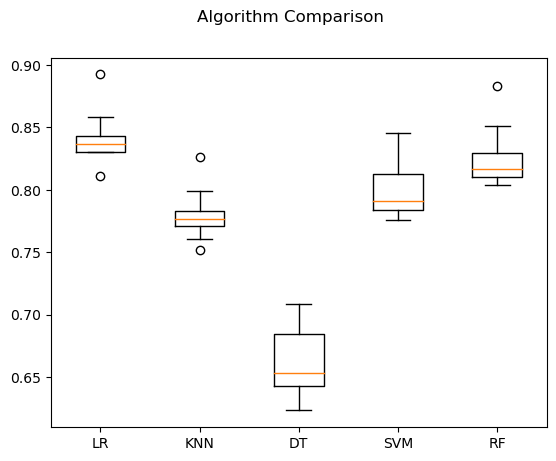

In [25]:
###prepare models
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('RF',RandomForestClassifier()))
###evaluate each model
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = KFold(n_splits=10,random_state = 99,shuffle=True)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The interquartile range (IQR), represented by the height of the box, shows the spread of the middle 50% of the scores. A smaller IQR indicates more consistent performance. 
 
- The Logistic Regression model, the Random Forest model have the highest median ROC AUC score and smaller box, indicating it generally performs better and more consistently across different runs or cross-validation folds than the other algorithms.  

### Hyperparameter Tuning with GridSearchCV or RandomizedSearchCV


In [44]:
# 1. Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

print("Best Parameters:", grid_search_lr.best_params_)
print('Best Score:', grid_search_lr.best_score_)
print(f'The best estimator: {best_lr}')


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8407181520886897
The best estimator: LogisticRegression(C=100)


Setting the random_state parameter to None when using RandomizedSearchCV will generate a new set of random parameter combinations each time the search is run. This allows for more diversity in the results, as the combinations will not be repeated between searches. This can be beneficial when trying to find the best performing model for a given dataset, as it allows for a larger number of parameter configurations to be explored.

In [48]:
# 2. Random Forest Hyperparameter Tuning
param_dist = {
        'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist,
                                       scoring='accuracy', n_jobs=-1, cv=5, verbose=1, n_iter=20, random_state=99)
random_search_rf.fit(X_train, y_train)
best_rf_RS = random_search_rf.best_estimator_
print("Best Parameters:", random_search_rf.best_params_)
print('Best Score:', random_search_rf.best_score_)
print(f'The best estimator: {best_rf_RS}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/dangthiphuongthao/Documents/Apps/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dangthiphuongthao/Documents/Apps/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dangthiphuongthao/Documents/Apps/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/dangthiphuongthao/Documents/Apps/anaconda3/lib/python3.11/site

Best Parameters: {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best Score: 0.7995943204868154
The best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1400)


### Evaluation and Model Selection

#### Make prediction of customer churn

In [59]:
# Logistic Regression on Test Set
prob_predictions_lr = best_lr.predict_proba(X_validation)[:, 1]
y_pred_lr = best_lr.predict(X_validation)
roc_auc_lr = roc_auc_score(y_validation, prob_predictions_lr)
print(confusion_matrix(y_validation, y_pred_lr))
print(classification_report(y_validation, y_pred_lr))
print("Tuned Logistic Regression ROC AUC:", roc_auc_lr)
print('=====================================================')

# Random Forest on Test Set
prob_predictions_rf = best_rf_RS.predict_proba(X_validation)[:, 1]
y_pred_rf = best_rf_RS.predict(X_validation)
roc_auc_rf = roc_auc_score(y_validation, prob_predictions_rf)
print(confusion_matrix(y_validation, y_pred_rf))
print(classification_report(y_validation, y_pred_rf))
print("Tuned Random Forest ROC AUC:", roc_auc_rf)
print('=====================================================')
# # Select the final model based on the test set results
# final_model = best_lr if roc_auc_lr > roc_auc_rf else best_rf_RS
# print("Selected Model:", 'Logistic Regression' if final_model == best_lr else 'Random Forest')


[[1400  152]
 [ 264  297]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.53      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Tuned Logistic Regression ROC AUC: 0.8483475981770402
[[1411  141]
 [ 285  276]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Tuned Random Forest ROC AUC: 0.8423292583200103


In [ ]:
## TN , FP 
## FN , TP

#### Vizualize AUC ROC

In [60]:
# Select the final model based on the test set results
final_model = best_lr if roc_auc_lr > roc_auc_rf else best_rf_RS
print("Selected Model:", 'Logistic Regression' if final_model == best_lr else 'Random Forest')

Selected Model: Logistic Regression


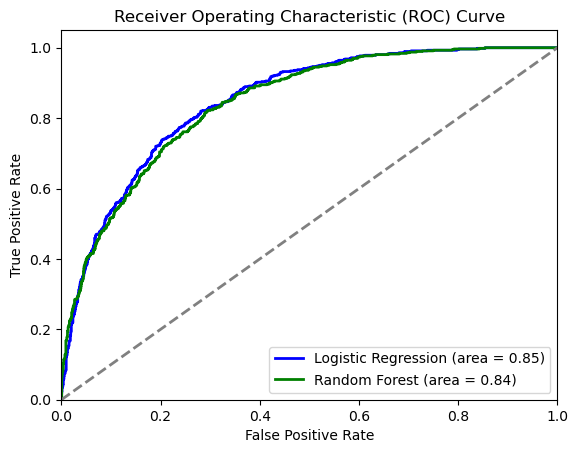

In [62]:

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_validation, prob_predictions_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_validation, prob_predictions_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest + K-Fold Cross-Validation
Evaluate the performance of a Random Forest model for predicting customer churn by calculating the ROC AUC score across different data splits (5-fold cross-validation)

In [65]:
kfold = KFold(n_splits=5, shuffle=True)
# enumerate splits
scores = []
models = []
for train_ix, test_ix in kfold.split(X_train):
    train_X, test_X = X_train.iloc[train_ix], X_train.iloc[test_ix]
    train_y, test_y = y_train.iloc[train_ix], y_train.iloc[test_ix]
    # fit model
    model = RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                   min_samples_leaf=4, max_features='sqrt',
                                   max_depth=60, bootstrap=True)
    model.fit(train_X, train_y)
    models.append(model)
    # evaluate model
    yhat = model.predict_proba(test_X)[:, -1]
    auc_score = roc_auc_score(test_y, yhat)
    # store score
    scores.append(auc_score)
    print('> ', auc_score)
# summarize model performance
mean_s, std_s = np.mean(scores), np.std(scores)
print('Mean: %.3f, Standard Deviation: %.3f' % (mean_s, std_s))

>  0.8498197685448682
>  0.8378171828171828
>  0.844302166049973
>  0.8412130505153761
>  0.8405684541022888
Mean: 0.843, Standard Deviation: 0.004


In [73]:
# prepare final result dataframe
final_res = pd.DataFrame(index=X_validation.index)
i = 0
for model in models:
    final_res[f'fold{i}'] = [item[1] for item in model.predict_proba(X_validation)]
    i += 1

# calculate the final predictions
final_res['final_prediction'] = final_res.mean(axis=1)
final_res['prediction_2'] = (final_res['fold0'] + final_res['fold1']) / 2

# inspect the final result
final_res.head()

,fold0,fold1,fold2,fold3,fold4,final_prediction,prediction_2
2905,0.229360,0.264853,0.298913,0.284603,0.245991,0.264744,0.247107
6651,0.023434,0.084511,0.109043,0.069622,0.085373,0.074397,0.053972
5321,0.224286,0.150851,0.201856,0.208402,0.190274,0.195134,0.187569
4293,0.546591,0.556927,0.642512,0.591405,0.629984,0.593484,0.551759
5686,0.536839,0.575485,0.580254,0.633834,0.599601,0.585203,0.556162


In [74]:
print(roc_auc_score(y_validation, final_res['final_prediction']))

0.8406271247955602


In [75]:
print(roc_auc_score(y_validation, final_res['prediction_2']))

0.8402630382049726


#### Interpreting the Charts
- Gain Chart:
The Gain chart shows the effectiveness of the model in capturing the responders in the top deciles. The closer the cumulative response rate is to 1, the better the model performs.
- Lift Chart:
Lift measures how much better the model is at identifying responders compared to random selection. A higher lift in the top deciles suggests the model has good discriminatory power.

In [77]:
best_rf_RS.predict_proba(X_validation)

array([[0.72065646, 0.27934354],
       [0.91740484, 0.08259516],
       [0.81226654, 0.18773346],
       ...,
       [0.84306283, 0.15693717],
       [0.94539565, 0.05460435],
       [0.54558365, 0.45441635]])

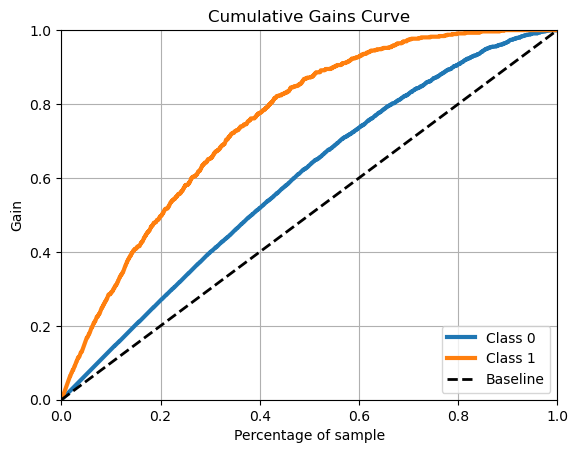

In [85]:
predicted_probas = best_rf_RS.predict_proba(X_validation)
skplt.metrics.plot_cumulative_gain(y_validation, predicted_probas)
plt.show()

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

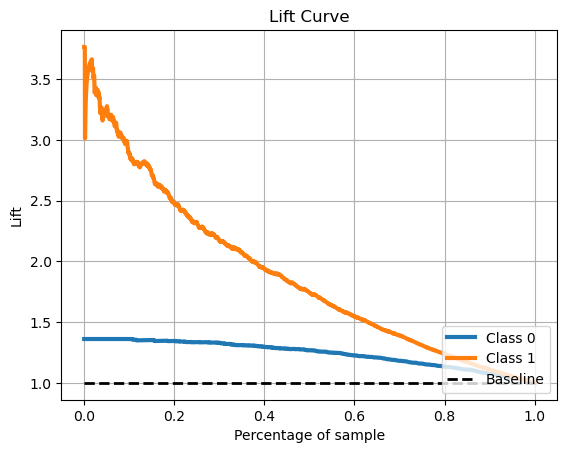

In [87]:
skplt.metrics.plot_lift_curve(y_true=y_validation, y_probas=predicted_probas)


#### Conclusion from Gain and Lift Charts

**Gain Chart:**
- The Gain chart shows the effectiveness of the model in capturing the responders in the top deciles.
- The closer the cumulative response rate is to 1, the better the model performs.
- The chart indicates that the model is effective in identifying the top deciles of responders, suggesting good model performance.

**Lift Chart:**
- Lift measures how much better the model is at identifying responders compared to random selection.
- A higher lift in the top deciles suggests the model has good discriminatory power.
- The chart shows that the model has a significantly higher lift in the top deciles, indicating strong discriminatory power and effectiveness in identifying responders.